In [83]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [126]:
tickers = ['USDRUB=X']
data_source = 'yahoo'
start_date = '2007-12-18'
end_date = '2017-12-17'

df = data.DataReader(tickers, data_source, start_date, end_date).to_frame()
df.reset_index(inplace=True)
df.set_index('Date', inplace=True, verify_integrity=True, drop=True)
df.sort_index(inplace=True)
print(df.shape)
df.to_csv('usdrub.csv')
pd.concat((df.head(), df.tail()), axis=0)

(2579, 7)


,minor,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2007-12-17,USDRUB=X,24.700001,24.700001,24.771000,24.669001,24.695999,0.0
2007-12-19,USDRUB=X,24.730000,24.730000,24.767000,24.690001,24.695000,0.0
2007-12-20,USDRUB=X,24.778999,24.778999,24.789000,24.722000,24.729000,0.0
2007-12-21,USDRUB=X,24.750000,24.750000,24.777000,24.704000,24.774000,0.0
2007-12-24,USDRUB=X,24.715000,24.715000,24.750000,24.700001,24.750000,0.0
2017-12-12,USDRUB=X,58.912899,58.912899,59.243900,58.582001,58.912998,0.0
2017-12-13,USDRUB=X,59.184299,59.184299,59.229401,58.716301,59.190201,0.0
2017-12-14,USDRUB=X,58.550201,58.550201,58.876999,58.243000,58.523899,0.0
2017-12-15,USDRUB=X,58.811501,58.811501,58.986000,58.615002,58.806499,0.0


In [162]:
df.index.weekday.value_counts()

3    516
2    516
1    515
0    515
6    301
4    216
Name: Date, dtype: int64

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2579 entries, 2007-12-17 to 2017-12-18
Data columns (total 7 columns):
minor        2579 non-null object
Adj Close    2579 non-null float64
Close        2579 non-null float64
High         2579 non-null float64
Low          2579 non-null float64
Open         2579 non-null float64
Volume       2579 non-null float64
dtypes: float64(6), object(1)
memory usage: 161.2+ KB


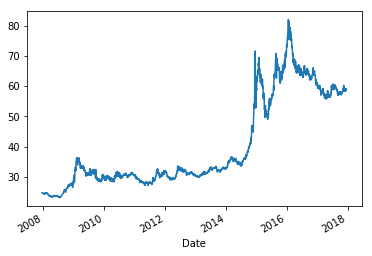

In [129]:
df.Open.plot()

In [137]:
df_alldays = df.resample('D').ffill()[:-1]
halfspread = 0.0
df_alldays['BuyPrice'] = df_alldays.Open * (1 + halfspread)
df_alldays['SellPrice'] = df_alldays.Open * (1 - halfspread)

,BuyPrice,SellPrice
Date,,
0,20979.847814,20979.847814
1,21017.138139,21017.138139
2,21020.037949,21020.037949
3,20984.576194,20984.576194
4,20993.775803,20993.775803
5,20993.775803,20993.775803
6,20990.204897,20990.204897


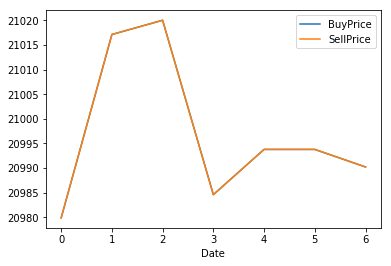

In [173]:
by_weekday = df_alldays.groupby(df_alldays.index.weekday)['BuyPrice', 'SellPrice'].sum()
by_weekday.plot()
by_weekday

In [180]:
results = [[(by_weekday.SellPrice[day_sell] - by_weekday.BuyPrice[day_buy]) 
            for day_sell in range(7)] for day_buy in range(7)]

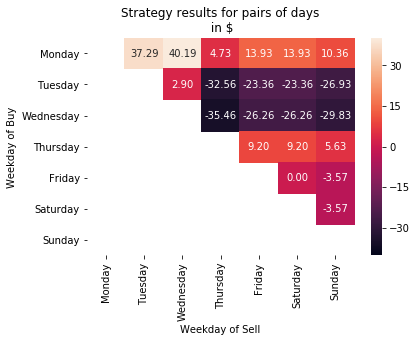

In [181]:
def plot_results(results):
    day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ax = sns.heatmap(results, annot=True, fmt='.2f', mask=np.tril(np.ones((7,7)), 0), 
                xticklabels=day_labels, yticklabels=day_labels)
    ax.set_xlabel('Weekday of Sell')
    ax.set_ylabel('Weekday of Buy')
    ax.set_title('Strategy results for pairs of days\n in $');
plot_results(results)

In [153]:
results2 = []
for day_buy in range(7):
    tmp_res = []
    for day_sell in range(7):
        if day_buy < day_sell:
            df_alldays['SignalBuy'] = (df_alldays.index.weekday==day_buy).astype(int)
            df_alldays['SignalSell'] = (df_alldays.index.weekday==day_sell).astype(int)
            df_alldays['result'] = (df_alldays.SignalSell * df_alldays.SellPrice) - (df_alldays.SignalBuy * df_alldays.BuyPrice)
            tmp_res.append(df_alldays.result.sum())
        else:
            tmp_res.append(0)
    results2.append(tmp_res)

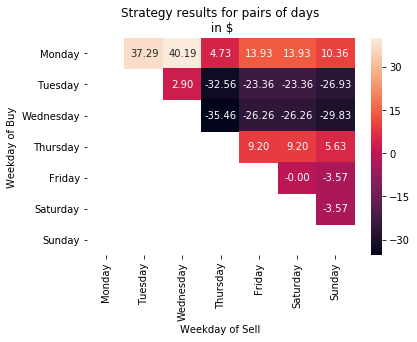

In [154]:
plot_results(results2)

In [191]:
!python simple_strategy.py

In [192]:
!pipreqs tmp

INFO: Successfully saved requirements file in tmp/requirements.txt
